In [2]:
from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

In [68]:
titles=[]
training_set=[]
stopWords = []
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt') #建立詞頻表

In [69]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt', 'r', encoding='UTF-8') as file:   #建立停用詞列表
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [70]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/cutword-1.txt', 'r', encoding='UTF-8') as file:  #叫出剛剛存下來的標題文字檔
    for data in file.readlines():
        data = data.strip()
        titles.append(data)

In [71]:
for title in titles:
    seg_list = jieba.lcut(title, cut_all=False)
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', seg_list))   #去除停用詞
    training_set.append(remainderWords)
    
print(training_set)

model = Word2Vec(training_set, min_count=1)

[['\t'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', '\t', '\t', '\t', '「', '\t', '花蓮', '\t', '」', '\t', '捐血', '\t', '\t', '全聯', '禮券', '\t', '400', '\t', '\t', '春聯'], ['\t', '\t', ' ', '\t', '\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'iHerb', '\t', ' ', '\t', '年底', '\t', '清倉', '\t', '\t', '至', '\t', '\t', '\t', '！'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', '雷亞', '\t', ' ', '\t', 'Cytus', '\t', ' ', '\t', '\t', ' ', '\t', '手機', '\t', '音樂', '遊戲', '\t', ' ', '\t', '限免'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'Line', '\t', ' ', '\t', 'Point', '\t', ' ', '\t'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', 'Zendure', '\t', ' ', '\t', '10000mAh', '\t', ' ', '\t', '\t', '\t', '充', '行動', '\t', '電源', '\t', ' ', '\t', '\t', '911'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t', ']', '\t', ' ', '\t', '\t', '\t', '\t', '屏東', '\t', '捐血', '\t', '\t', '\t'], ['\t', '\t', ' ', '\t', '\t', '情報', '\t',

In [7]:
from gensim.models import word2vec

In [8]:
model = word2vec.Word2Vec(training_set,size = 1)
model.save('jk.model')

In [9]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    #print text
    for word in text.split():
        #print word
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [10]:
def sent_vectorizer(sent, model):  #建立sentence vector
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for record in training_set:
    X.append(sent_vectorizer(record, model))   
 
print ("========================")
print(X) #印出每個標題的vector

<ipython-input-10-bfd84729e5c7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = model[w]
<ipython-input-10-bfd84729e5c7>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = np.add(sent_vec, model[w])


[array([2.1894774], dtype=float32), array([2.0288146], dtype=float32), array([1.9939886], dtype=float32), array([2.120501], dtype=float32), array([2.0246236], dtype=float32), array([2.128352], dtype=float32), array([2.1443388], dtype=float32), array([2.092553], dtype=float32), array([2.067263], dtype=float32), array([2.1046324], dtype=float32), array([2.0108085], dtype=float32), array([2.045167], dtype=float32), array([2.062957], dtype=float32), array([1.9779495], dtype=float32), array([2.1399248], dtype=float32), array([1.9755776], dtype=float32), array([2.1293623], dtype=float32), array([2.0010931], dtype=float32), array([1.9502732], dtype=float32), array([2.040033], dtype=float32), array([1.9610126], dtype=float32), array([2.051672], dtype=float32), array([2.1330538], dtype=float32), array([1.9582554], dtype=float32), array([2.0121913], dtype=float32), array([2.0303545], dtype=float32), array([2.0892863], dtype=float32), array([2.0465083], dtype=float32), array([2.053933], dtype=flo

In [11]:
print(X)

[array([2.1894774], dtype=float32), array([2.0288146], dtype=float32), array([1.9939886], dtype=float32), array([2.120501], dtype=float32), array([2.0246236], dtype=float32), array([2.128352], dtype=float32), array([2.1443388], dtype=float32), array([2.092553], dtype=float32), array([2.067263], dtype=float32), array([2.1046324], dtype=float32), array([2.0108085], dtype=float32), array([2.045167], dtype=float32), array([2.062957], dtype=float32), array([1.9779495], dtype=float32), array([2.1399248], dtype=float32), array([1.9755776], dtype=float32), array([2.1293623], dtype=float32), array([2.0010931], dtype=float32), array([1.9502732], dtype=float32), array([2.040033], dtype=float32), array([1.9610126], dtype=float32), array([2.051672], dtype=float32), array([2.1330538], dtype=float32), array([1.9582554], dtype=float32), array([2.0121913], dtype=float32), array([2.0303545], dtype=float32), array([2.0892863], dtype=float32), array([2.0465083], dtype=float32), array([2.053933], dtype=flo

In [13]:
import jieba
import re

# 載入繁體
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt')
doc_seg = []

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/Lifeequailmoney.txt', 'r', encoding='utf-8') as file:
    text = file.readline()
    text = re.sub('[^\u4e00-\u9fa5]+','',text)
    doc_seg.append(jieba.lcut(text))

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/0131-write.txt', 'w', encoding='utf-8') as file:
    for doc in doc_seg:
        file.write(' '.join(doc))

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
Dumping model to file cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
Loading model cost 2.350 seconds.
DEBUG:jieba:Loading model cost 2.350 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [54]:
from gensim.models import word2vec
import gensim

# sg=1 -> skip-gram, sg=0 -> cbow
sg = 0
# 向前看幾個字或向後看幾個字
win_size = 2
# 向量維度
vector_size = 300
epochs = 10

# sentences = word2vec.LineSentence('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')
model = word2vec.Word2Vec(
    sentences, 
    size=300, 
    window=win_size, 
    sg=sg, 
    min_count=1,
    iter=epochs)

model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model')

In [55]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model")

In [56]:
model.most_similar(['全家'])

<ipython-input-56-9b1a1576cbfb>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['全家'])


[('PChome', 0.14696389436721802),
 ('台南', 0.13122132420539856),
 ('711', 0.12676627933979034),
 ('新聞', 0.11603961884975433),
 ('電子', 0.10434246063232422),
 ('特價', 0.09563684463500977),
 ('無印良品', 0.08755753934383392),
 ('整理', 0.08473358303308487),
 ('商城', 0.07896285504102707),
 ('免運', 0.07733015716075897)]

In [58]:
model.most_similar(['咖啡'])

<ipython-input-58-84e6bf4d2e4e>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['咖啡'])


[('禮物', 0.11937759071588516),
 ('跑鞋', 0.11633827537298203),
 ('禮券', 0.11015921831130981),
 ('美式', 0.09711360931396484),
 ('露天', 0.0899081826210022),
 ('雙11', 0.08978258818387985),
 ('東森', 0.08483158051967621),
 ('限量', 0.0836886540055275),
 ('Yahoo', 0.08350703120231628),
 ('app', 0.08273544907569885)]

In [59]:
model.most_similar(['蝦皮'])

<ipython-input-59-1cf74e840cda>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['蝦皮'])


[('711', 0.13127341866493225),
 ('10%', 0.11190274357795715),
 ('限時:', 0.10742688924074173),
 ('回饋', 0.10142046213150024),
 ('PChome', 0.0761193186044693),
 ('康是美', 0.07080568373203278),
 ('無線', 0.05612816661596298),
 ('指定', 0.04677848890423775),
 ('momo', 0.04631314426660538),
 ('家樂福', 0.04464329034090042)]

In [61]:
model.most_similar(['捐血'])

<ipython-input-61-5aff319c901d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['捐血'])


[('電子書', 0.08843424916267395),
 ('美式', 0.0861135870218277),
 ('GoShare', 0.08480487763881683),
 ('買一送一', 0.08208522200584412),
 ('禮券', 0.08186818659305573),
 ('限定', 0.08156627416610718),
 ('全聯', 0.07738561928272247),
 ('2023', 0.07460490614175797),
 ('foodomo', 0.06933392584323883),
 ('購物', 0.06466174125671387)]

In [65]:
model.most_similar(['1111'])

<ipython-input-65-9fc29e5d67a7>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['1111'])


[('雙11', 0.149257630109787),
 ('無印良品', 0.12689991295337677),
 ('新聞', 0.1186528354883194),
 ('紅包', 0.11368662118911743),
 ('蝦皮:', 0.10952110588550568),
 ('漢堡王', 0.10389812290668488),
 ('貼圖', 0.09916386008262634),
 ('簽到', 0.09596267342567444),
 ('露天', 0.09461773931980133),
 ('線上', 0.09282174706459045)]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21335 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32862 missing from current font.
  font.set_text

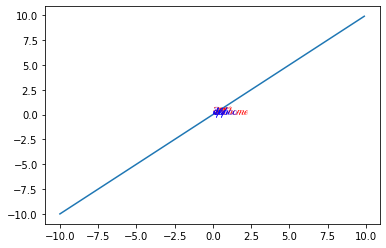

In [67]:
from gensim.models import word2vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

mopdelfilePath = '/content/drive/MyDrive/Colab Notebooks/wordcloud/word2vec.model'
model = word2vec.Word2Vec.load(mopdelfilePath)
raw_word_vec = model.wv.vectors

cent_word1 = "全家"
cent_word2 = "咖啡"
cent_word3 = "捐血"
cent_word4 = "1111"
cent_word5 = "蝦皮"

wordList1 = model.wv.most_similar_cosmul(cent_word1)
wordList2 = model.wv.most_similar_cosmul(cent_word2)
# wordList3 = model.wv.most_similar_cosmul(cent_word3)
# wordList4 = model.wv.most_similar_cosmul(cent_word4)
# wordList5 = model.wv.most_similar_cosmul(cent_word5)


wordList1 = np.append([item[0] for item in wordList1], cent_word1)
wordList2 = np.append([item[0] for item in wordList2], cent_word2)
# wordList3 = np.append([item[0] for item in wordList3], cent_word3)
# wordList4 = np.append([item[0] for item in wordList4], cent_word4)
# wordList5 = np.append([item[0] for item in wordList5], cent_word5)

def get_word_index(word):
    index = model.wv.vocab[word].index
    return index

index_list1 = map(get_word_index, wordList1)
index_list2 = map(get_word_index, wordList2)
# index_list3 = map(get_word_index, wordList3)
# index_list4 = map(get_word_index, wordList4)
# index_list5 = map(get_word_index, wordList5)

vec_reduced = PCA(n_components=2).fit_transform(raw_word_vec)
zhfont = matplotlib.font_manager.FontProperties(fname=r'/content/drive/MyDrive/Colab Notebooks/wordcloud/himalaya.ttf')
x = np.arange(-10, 10, 0.1)
y = x
plt.plot(x, y)

for i in index_list1:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='r', fontproperties=zhfont)

for i in index_list2:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='b', fontproperties=zhfont)

# for i in index_list3:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='g', fontproperties=zhfont)

# for i in index_list4:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='k', fontproperties=zhfont)

# for i in index_list5:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)
# plt.show()

In [ ]:
/content/drive/MyDrive/Colab Notebooks/wordcloud/corpusSegDone.txt
/content/drive/MyDrive/Colab Notebooks/wordcloud/

In [52]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
 
model = Word2Vec(
    LineSentence(open('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt', 'r', encoding='utf8')),
    sg = 0,
    size = 100,
    window = 3,
    min_count = 1,
    workers=8
)
 
# 词向量保存
model.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector', binary=False)
 
# 模型保存
model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')

In [27]:

import gensim
 
# 1 通过模型加载词向量(recommend)
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
 
dic = model.wv.index2word
print(dic)
print(len(dic))
 
print(model.wv['限時'])
print(model.most_similar('限時', topn=1))
 
# 2 通过词向量加载
vector = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/wordcloud/data.vector')



['Line', 'LINE', 'pay', '全家', '回饋', '咖啡', 'momo', 'Momo', '限時', 'line', '活動', '蝦皮', '折扣', '購物', '捐血', '1111', '台北', '限定', '星巴克', 'Point', 'point', 'POINT', '免運', 'PChome', '點數', '美亞', '購物金', '家樂福', '支付', '整理', '會員', '導購', '電影票', '貼圖', '買一送一', '買1送1', '雙11', '康是美', '電子書', '7-11', '711', '羅技', '生活市集', '好市多', '黑色購物', '無印良品', '博客來', '漢堡王']
48
[-7.8738591e-04  2.7012783e-03 -1.6156185e-03  4.5027761e-03
 -2.5887804e-03 -2.9529412e-03  3.4788067e-03 -4.3897382e-03
  6.3906075e-04  9.5141964e-04 -4.2156922e-03  2.7189676e-03
 -1.2006904e-03  2.3770186e-03 -8.4766891e-04 -2.3816223e-03
 -4.4706613e-03  3.4471408e-03  4.0879315e-03  3.6871750e-03
  4.0682075e-03  4.2193308e-03  4.5239353e-03 -1.7107044e-03
  3.4934208e-03 -1.6435769e-03  2.9768625e-03 -2.1655944e-03
  9.4102818e-04 -1.6142147e-03  6.5427320e-04 -2.1510930e-03
 -1.3958225e-03  4.4630496e-03 -4.1596009e-03 -7.2215666e-04
  3.4162126e-04  3.7648524e-03  2.5716554e-03 -2.9757330e-03
  3.8611984e-03  4.5344052e-03  3.8319677e-03 -2.

<ipython-input-27-c8f61ad806c9>:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('限時', topn=1))


There are 105 words in vocab
please input how many words you want to plot:30


<ipython-input-116-b404fb17181f>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotli

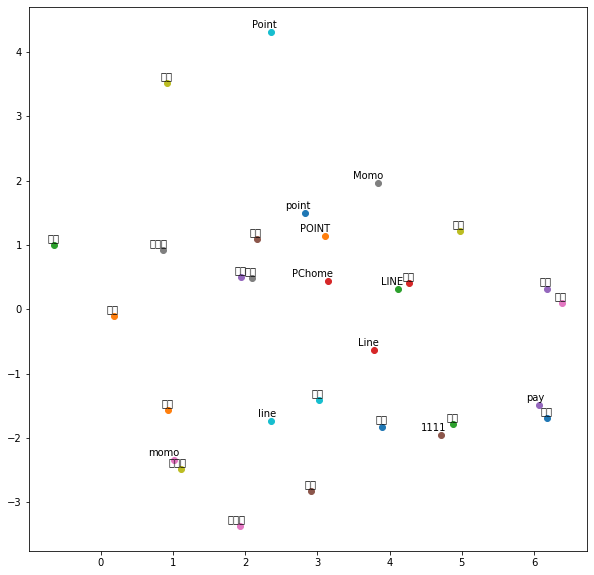

In [116]:
from builtins import bytes, range
 
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="himalaya.ttf",size=20)
 
 
def tsne_plot(model, words_num):
 
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
 
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(10, 10))
    for i in range(words_num):
        plt.scatter(x[i], y[i])
        if b'\xe0' in bytes(labels[i],encoding="utf-8"):
            this_font = font
        else:
            this_font = 'SimHei'
        plt.annotate(labels[i],
                     Fontproperties=this_font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
 
if __name__ == '__main__':
    model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/wordcloud/test.model')
    print(f'There are {len(model.wv.index2word)} words in vocab')
    word_num = int(input('please input how many words you want to plot:'))
    tsne_plot(model, word_num)

In [79]:
from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

titles=[]
training_set=[]
stopWords = []
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt') #建立詞頻表

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt', 'r', encoding='UTF-8') as file:   #建立停用詞列表
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt', 'r', encoding='UTF-8') as file:  #叫出剛剛存下來的標題文字檔
    for data in file.readlines():
        data = data.strip()
        titles.append(data)
        
for title in titles:
    seg_list = jieba.lcut(title, cut_all=False)
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', seg_list))   #去除停用詞
    training_set.append(remainderWords)
    
print(training_set)

model = Word2Vec(training_set, min_count=1)

[['隨著', '白宮', '和', '加州', '分別', '宣布', '將於', '月底', '和', '月底', '結束', '疫情', '緊急狀態', '和', '公共衛生', '緊急狀態', '，', '灣區', '為', '數百萬', '居民', '提供', '服務', '疫苗', '接種', '站', '和', '檢測站', '，', '將在', '未來', '幾個', '內', '逐步', '停止', '營運', '，', '象徵', '著', '這項', '為', '百年一遇', '疫情', '調動', '大規模', '公共衛生', '資源', '行動', '即將', '告一段落', '。'], [], ['這項', '地方', '和', '聯邦', '層級', '措施', '改變', '意味著', '，', '與', '新冠', '相關', '醫療保健', '成本', '將', '轉嫁到', '消費者', '身上', '，', '民眾', '未來', '仍然', '可以', '透過', '私人', '醫療保險', '和', '藥房', '接種', '疫苗', '和', '接受', '檢測', '。'], [], ['聖', '他', '克拉拉', '縣', '宣布', '，', '會', '在', '本月底', '前', '拆除', '位於', '聖', '他', '克拉拉', '縣', '廣場', 'San', ' ', 'Jose', ' ', 'County', ' ', 'Fairgrounds', '聖馬汀', 'San', ' ', 'Martin', '和', '山景', '城', '三個', '僅存', '疫苗', '接種', '站', '和', '檢測站', '，', '拆除', '時間', '約', '在', '日到', '28', '之間', '。', '聖', '他', '克拉拉', '縣', '官員', '表示', '，', '他們', '會', '繼續', '在', '診所', '和', '醫院', '為', '低收入', '居民', '提供', '疫苗', '接種', '和', '檢測', '服務', '。'], [], ['聖', '他', '克拉拉', '縣', '衛生局', '局長', '柯迪', 'Sara'

In [88]:
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/training_set.txt', 'w') as f:
    for item in training_set:
        f.write("%s\n" % item)

In [99]:
import pandas as pd

df = pd.DataFrame(training_set)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/words.csv', index=False)

In [82]:
def sent_vectorizer(sent, model):  #建立sentence vector
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for record in training_set:
    X.append(sent_vectorizer(record, model))   
 
print ("========================")
print(X) #印出每個標題的vector

[array([-8.3608157e-04, -1.1336777e-04,  2.2085171e-04,  1.3040131e-03,
       -4.1630617e-04, -2.0083993e-04, -1.0204767e-03,  1.8992469e-03,
       -5.7575310e-04, -1.4055988e-03,  1.1863645e-04,  3.8171289e-04,
       -2.3779074e-04,  3.9836776e-04,  6.2313868e-04, -1.3960418e-04,
        2.2946090e-04,  1.0699653e-03, -9.1099885e-04, -6.7533186e-04,
       -2.0040698e-04,  2.3464591e-04,  1.8696599e-04, -1.2750262e-03,
        6.1906496e-04, -3.7181797e-04,  1.1006569e-03, -2.6281987e-04,
        1.6456218e-04, -7.6440490e-05,  1.0248080e-03,  2.2720566e-04,
       -1.0265480e-03,  3.1779465e-04, -6.5301760e-04, -4.0159820e-04,
       -1.2505034e-04,  4.9154542e-04, -2.9863813e-04, -3.9149891e-04,
        3.9625401e-04,  6.7485322e-04,  3.8054239e-04,  1.1182169e-03,
       -7.7025243e-04, -4.1281257e-04, -3.8564263e-04,  6.2534073e-04,
       -2.1049698e-05, -4.2652237e-04, -1.7893556e-04, -6.6704472e-04,
        4.5653002e-04,  3.6765775e-04,  5.5516942e-04, -3.2381809e-04,
     

<ipython-input-82-bfd84729e5c7>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = model[w]
<ipython-input-82-bfd84729e5c7>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vec = np.add(sent_vec, model[w])


In [92]:
import word2vec

In [91]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=143989 sha256=a9c13490f2a04eeaef41b24696a9c80b8d12d5ce006d839fe662c0ad87dce521
  Stored in directory: /root/.cache/pip/wheels/d9/b0/11/87d7a6c76458790285839bd80e87ddc52dc4108f0063f24307
Successfully built word2vec


In [112]:
import jieba
import re

# 載入繁體
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt')
doc_seg = []

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/wordnews.txt', 'r', encoding='utf-8') as file:
    text = file.readline()
    text = re.sub('[^\u4e00-\u9fa5]+','',text)
    doc_seg.append(jieba.lcut(text))

with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/delete_words.txt', 'w', encoding='utf-8') as file:
    for doc in doc_seg:
        file.write(' '.join(doc))

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/Colab Notebooks/wordcloud/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u0d10bc7f962f61814f1c66bf916ac445.cache
Loading model cost 1.735 seconds.
DEBUG:jieba:Loading model cost 1.735 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [106]:
from gensim.models import word2vec
import gensim

# sg=1 -> skip-gram, sg=0 -> cbow
sg = 0
# 向前看幾個字或向後看幾個字
win_size = 2
# 向量維度
vector_size = 300
epochs = 10

sentences = word2vec.LineSentence("/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt")
model = word2vec.Word2Vec(
    sentences, 
    size=300, 
    window=win_size, 
    sg=sg, 
    min_count=1,
    iter=epochs)

model.save('/content/drive/MyDrive/Colab Notebooks/wordcloud/news/word2vec.model')

In [107]:
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/wordcloud/news/word2vec.model")

In [108]:
model['白宮']

<ipython-input-108-a4e6e0769029>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['白宮']


array([-1.38572650e-03,  1.64977449e-03,  1.50344952e-03,  1.42100267e-03,
       -2.01029616e-04,  1.57875905e-03, -1.19575649e-03, -4.51935106e-04,
        1.34961354e-03,  6.44194719e-04, -6.18944119e-04, -5.05015429e-04,
       -3.30351962e-04,  7.93265586e-04,  1.46988477e-03, -3.29778908e-04,
        4.68533544e-04,  1.09119341e-03,  4.03521932e-04, -2.24895368e-04,
       -3.52361931e-05, -3.43954220e-04, -1.47640135e-03,  1.61422638e-03,
        9.10638308e-04,  9.77521413e-04, -4.66632744e-04,  1.90440129e-04,
        1.39536406e-03, -1.52528146e-03,  1.54197554e-03, -1.38764852e-03,
        2.24890449e-04,  2.14732485e-04, -1.19311130e-03,  5.43062459e-04,
       -1.32588320e-03, -5.16926113e-04, -1.44410937e-03,  1.57209940e-03,
       -1.24214520e-03, -1.47252355e-03,  1.61687832e-03,  4.05130239e-04,
        6.55000098e-04,  9.80368699e-04, -1.05254899e-03, -1.57993461e-03,
       -7.55633402e-04, -1.11144362e-03,  1.29680987e-03, -1.54973811e-03,
        9.46089684e-04,  

In [111]:
model.most_similar(['加州'])

<ipython-input-111-eb76a4909d94>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar(['加州'])


[('調動', 0.10657098889350891),
 ('百年一遇', 0.10540513694286346),
 ('營運', 0.060100678354501724),
 ('數百萬', 0.046294987201690674),
 ('站', 0.04616976156830788),
 ('為', 0.03224703669548035),
 ('著', 0.026253625750541687),
 ('月底', 0.023021409288048744),
 ('行動', 0.020266583189368248),
 ('緊急狀態', 0.018454935401678085)]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32080 missing from current font.
  font.set_

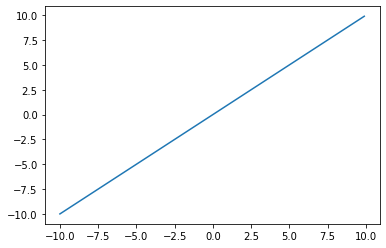

In [114]:
from gensim.models import word2vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# mopdelfilePath = 'D:\\ML_learning\\NLP_data\\model.bin'
# model = word2vec.Word2Vec.load(mopdelfilePath)
raw_word_vec = model.wv.vectors

cent_word1 = "白宮"
cent_word2 = "公共衛生"
# cent_word3 = "淘宝"
# cent_word4 = "自行车"
# cent_word5 = "计算机"

wordList1 = model.wv.most_similar_cosmul(cent_word1)
wordList2 = model.wv.most_similar_cosmul(cent_word2)
# wordList3 = model.wv.most_similar_cosmul(cent_word3)
# wordList4 = model.wv.most_similar_cosmul(cent_word4)
# wordList5 = model.wv.most_similar_cosmul(cent_word5)


wordList1 = np.append([item[0] for item in wordList1], cent_word1)
wordList2 = np.append([item[0] for item in wordList2], cent_word2)
# wordList3 = np.append([item[0] for item in wordList3], cent_word3)
# wordList4 = np.append([item[0] for item in wordList4], cent_word4)
# wordList5 = np.append([item[0] for item in wordList5], cent_word5)

def get_word_index(word):
    index = model.wv.vocab[word].index
    return index

index_list1 = map(get_word_index, wordList1)
index_list2 = map(get_word_index, wordList2)
# index_list3 = map(get_word_index, wordList3)
# index_list4 = map(get_word_index, wordList4)
# index_list5 = map(get_word_index, wordList5)

vec_reduced = PCA(n_components=2).fit_transform(raw_word_vec)
zhfont = matplotlib.font_manager.FontProperties(fname=r'/content/drive/MyDrive/Colab Notebooks/wordcloud/himalaya.ttf')
x = np.arange(-10, 10, 0.1)
y = x
plt.plot(x, y)

for i in index_list1:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='r', fontproperties=zhfont)

for i in index_list2:
    plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='b', fontproperties=zhfont)

# for i in index_list3:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='g', fontproperties=zhfont)

# for i in index_list4:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='k', fontproperties=zhfont)

# for i in index_list5:
#     plt.text(vec_reduced[i][0], vec_reduced[i][1], model.wv.index2word[i], color='c', fontproperties=zhfont)
plt.show()